# СБОРНЫЙ ПРОЕКТ №1

# Исследование трендов в индустрии игровых приставок: анализ  успешности видеоигр

## Описание проекта

### Цель исследования 

 - выявить определяющие успешность игры закономерности, проанализировав исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

*Путь к файлу:*
`/datasets/games.csv`. 

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Критерии оценки

### 1. Загрузка данных

In [1]:
#загрузка библиотек и датасета 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats as st

pd.options.display.max_columns = 15

In [63]:
games = pd.read_csv('/datasets/games.csv')

display(games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Для исследования загружен набор данных интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. В датасете представлена информация об исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах. 

Информация об играх включает в себя 16715 столбцов и 11 колонок: название, платформа, год выпуска, продажи в Северной Америке (млн), продажи в Европе (млн), продажи в Японии (млн), продажи в других странах (млн), оценка критиков (макс. 100), оценка пользователей (макс. 10), рейтинг от организации ESRB. 

### 2. Предобработка данных

In [3]:
#посмотрим общую информацию
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Нарушен регистр**

- необходимо привести к регистру snake_case

**Нарушены типы данных**

- необходимо произвести замену в типах данных:

    * Year_of_Release: float64 > int64 (год является челочисленным значением)

    * User_Score: object > float64 (очки пользователя могут быть и целочисленными, и дробными)

In [4]:
#переименуем столбцы в соответствии со стилем snake_case
games.columns = map(str.lower, games.columns)

#### Пропуски

In [5]:
#проверим пропуски

games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
pd.DataFrame(round(games.isna().mean().sort_values(ascending=False)*100,6)).style.background_gradient('coolwarm')

,0
critic_score,51.319174
rating,40.478612
user_score,40.089740
year_of_release,1.609333
name,0.011965
genre,0.011965
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


В данных имеется очень большое количество пропусков: 2 пропуска в названии, 2 в жанре, 269 (1.6%) в годе выпуска, 8578 (51%) в оценке критиков, 6701 (40%) в оценке пользователей, 6766 (40%) в рейтинге.

In [7]:
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

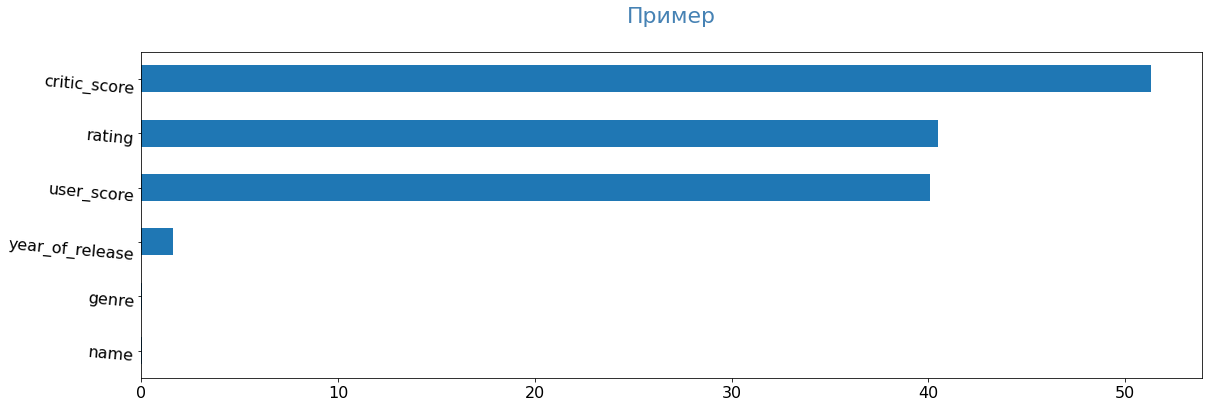

In [8]:
pass_value_barh(games)

Начнем обработку пропусков со столбца year_of_release.

Посмотрим на минимальный год данных.

In [9]:
games.year_of_release.min()

1980.0

In [10]:
# годы выпуска

release_year = games.pivot_table(index='platform',values='year_of_release',aggfunc=['min'])
release_year.columns=['release_year']
release_year.sort_values(by = 'release_year',ascending=True).head(15)

,release_year
platform,
2600,1980.0
NES,1983.0
DS,1985.0
PC,1985.0
GB,1988.0
SNES,1990.0
GEN,1990.0
GG,1992.0
SCD,1993.0


In [11]:
#количество игр для каждой платформы

games['platform'].value_counts().sort_values(ascending=True).head(15)

PCFX      1
GG        1
TG16      2
3DO       3
WS        6
SCD       6
NG       12
GEN      29
DC       52
NES      98
GB       98
2600    133
WiiU    147
SAT     173
SNES    239
Name: platform, dtype: int64

В датасете представлены данные с 1980 по 2016 год. Есть неактульные приставки, выпущенные более 20 лет назад, есть приставки с очень маленьким количеством игр. Сделаем срез данных по 1994 год - выход приставки PlayStaton 1, которая до сих пор является лидером рынка.

In [12]:
games = games.query('year_of_release >= 1994')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# проверим пропуски

games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8099
user_score         6243
rating             6315
dtype: int64

Следующий столбец с пропусками в столбце 'critic_score'. По этому параметру данные восстановить сложно, возможно, они вообще отсутствуют. Чтобы не искажать данные, заменим их нейтральным значением. 

Проверим, можно ли заменить на 0.

In [14]:
(games['critic_score'] == 0).value_counts()

False    16079
Name: critic_score, dtype: int64

In [15]:
# заполним пропуски
games['critic_score'] = games['critic_score'].fillna(0)


Следующий столбец с большим количеством пропусков - 'user_score'.

In [16]:
# проверим 0

(games['user_score'] == "0").value_counts()

False    16078
True         1
Name: user_score, dtype: int64

В столбце уже есть значение 0, поэтому заменить на 0 не можем. Заменим 0 на np.nan, в процессе дальнейшего заполнения пропусков он также заменится на 0. 
В данных есть нетипичное значение tbd - геймерская аббревиатура, которая расшифровывается как 'to be determined' - "будет определено". Это значит, что для этой строки нет значения, эту аббревиатуру можно приравнять к более типичному для питона NaN.

In [17]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games.loc[games['user_score'] == '0', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float64')

In [18]:
# заполним пропуски
games['user_score'] = games['user_score'].fillna(0)

Посмотрим на значения в столбце 'raiting'

In [19]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

На данном этапе рейтинг не оказывает влияния на ход исследования. Вернемся к нему при рассмотрения этого вопроса. Сейчас заменим на 'unknown'

In [20]:
# соотношение категорий рейтинга 

games['rating'].value_counts()

E       3921
T       2903
M       1535
E10+    1392
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [21]:
games['rating'] = games['rating'].fillna('unknown')

In [22]:
# проверим пропуски
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Дубликаты

In [23]:
#поиск явных дубликатов
games.duplicated().sum()

0

In [24]:
#поиск неявных дубликатов
#приведем столбцы к одному регистру

games['name'] = games['name'].str.lower() 
games['name'] = games['name'].str.replace('&', 'and')
games['genre'] = games['genre'].str.lower() 
games['platform'] = games['platform'].str.lower() 

In [25]:
#поиск неявных дубликатов 
games.duplicated(subset = ['name', 'platform', 'year_of_release']).sum()

1

In [26]:
games[['name','platform','year_of_release']].value_counts()

name                                                 platform  year_of_release
madden nfl 13                                        ps3       2012.0             2
 beyblade burst                                      3ds       2016.0             1
rapala tournament fishing!                           wii       2006.0             1
rapala fishing frenzy 2009                           ps3       2008.0             1
                                                     x360      2008.0             1
                                                                                 ..
hana to otome ni shukufuku o: harekaze no okurimono  ps2       2010.0             1
hanagumi taisen columns                              sat       1997.0             1
hanaoni: koisomeru koku - eikyuu no shirushi         psp       2011.0             1
hanaoni: yume no tsudzuki                            psp       2012.0             1
¡shin chan flipa en colores!                         ds        2007.0            

In [27]:
games.drop_duplicates(subset = ['name', 'platform', 'year_of_release'], keep='first', inplace=True)

In [28]:
games.duplicated(subset = ['name', 'platform', 'genre']).sum()

2

Проверка по столбцам 'name', 'platform', 'genre' показала наличие 2 дубликатов, однако добавление столбца year_of_release показала. что эти дубликаты неполные 

**Округлим значения critic_score и user_score до двух знаков**

In [29]:
games['critic_score'] = round(games['critic_score'], 2)
games['user_score'] = round(games['user_score'], 2)

In [30]:
#проверим таблицу после обработки 
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16078 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16078 non-null  object 
 1   platform         16078 non-null  object 
 2   year_of_release  16078 non-null  float64
 3   genre            16078 non-null  object 
 4   na_sales         16078 non-null  float64
 5   eu_sales         16078 non-null  float64
 6   jp_sales         16078 non-null  float64
 7   other_sales      16078 non-null  float64
 8   critic_score     16078 non-null  float64
 9   user_score       16078 non-null  float64
 10  rating           16078 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [31]:
#исправим тип year_of_release
games['year_of_release'] = games['year_of_release'].astype('int64')

In [32]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [33]:
#посмотрим на данные после предобработки
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,0.0,0.0,unknown,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16713,spirits and spells,gba,2003,platform,0.01,0.00,0.00,0.00,0.0,0.0,unknown,0.01


#### Промежуточный вывод

Предобработка данных включает в себя 6 этапов: 

* все названия столбцов и значения в таблице приведены к нижнему регистру;

* обработаны пропуски: 

    * по столбцу 'name' и 'genre' удалены 2 пропуска (названия игр восстановить невозможно, их продажи незначительны);
    
    * удалены строки с пропусками в 'year_of_release'
    
    * в столбцах 'critic_score' и 'user_score' много пропусков - 8578 (51%) и 6701 (40%), заменили на 0
        
    * в столбце 'rating' 6767 пропусков (40%), заменили на 'unknown'
    
* удалены строки с устаревшими данными (до 1994 - год выпуска PS1)

* был изменен тип данных: 'year_of_release' - int64;

* значения 'critic_score' и 'user_score' округлены до двух знаков;

* явные дубликаты не обнаружены, удален один неявный дубликат, найдены 2 неполных дубликата 

* для оптимизации дальнейшего исследования в таблицу добавлен столбец 'total_sales' - суммарное количество проданных копий по всему миру.

### 3. Исследовательский анализ

#### 3.1. Посмотрим, сколько игр выпускалось в разные годы

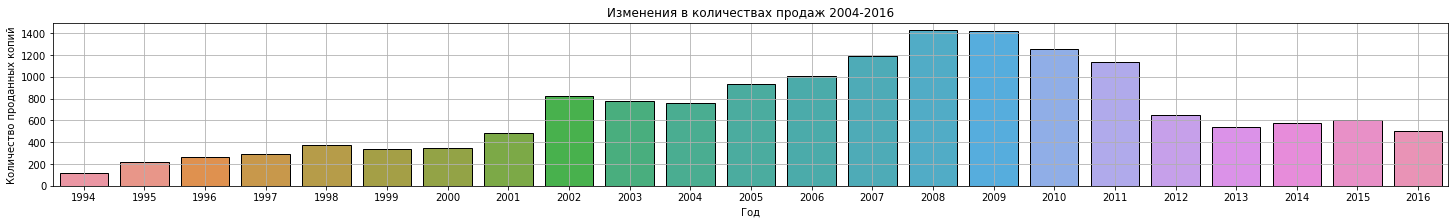

In [34]:
games_year_count = games.pivot_table(index='year_of_release', aggfunc={'name':'count'})
games_year_count.columns = ['quantity']
games_year_count

plt.figure(figsize=(25,3))
sns.barplot(x=games_year_count.index,y=games_year_count['quantity'], edgecolor = "black")
plt.title('Изменения в количествах продаж 2004-2016')
plt.grid()
plt.xlabel('Год')
plt.ylabel('Количество проданных копий');

На диаграмме видно, что первый резкий скачок продаж приходится на 2002 год - выше уровня 1994 года более чем в 4 раза. Далее наблюдается постепенный рост, пиковое значение которого пришлось на 2008-2009 года, достигнув почти 1.5 млрд. проданных копий. После продажи начали сокращаться с резким падением в 2012. С этого года продажи находятся примерно на одном уровне. В 2015 году было продано 600 млн копий. 2016 не достиг этой отметки, однако учитываем, что данные за этот год неполные. 

#### 3.2. Посмотрим, как менялись продажи по платформам 

#### Выберем платформы с наибольшим суммарными продажами и построим распределение по годам.

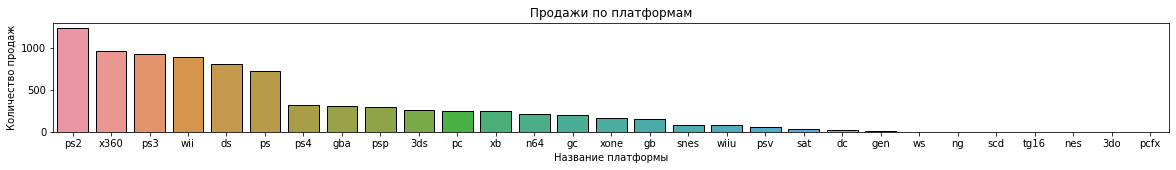

In [35]:
#сделаем сводную таблицу для подсчета общего количества продаж по платформам с 1994 года

platform_sales = games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum'
    ).sort_values(by='total_sales', ascending=False)

#визуализируем
plt.figure(figsize=(20,2))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'], edgecolor = "black")
plt.title('Продажи по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж');

Топ-6 составляют платформы, жизненный период которых на данных момент 9-11 лет. За топ-6 следует PS4 нового поколения - она обгоняет своих современников.

Построим на количество проданных копий игр для наиболее продаваемых консолей

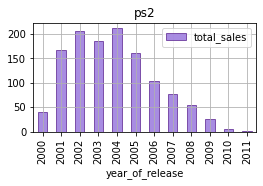

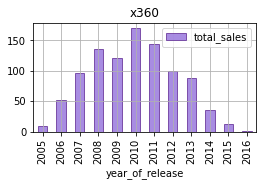

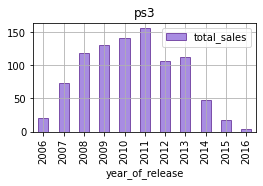

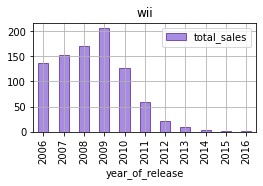

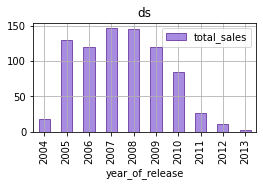

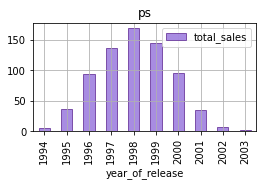

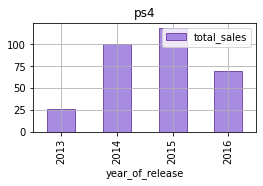

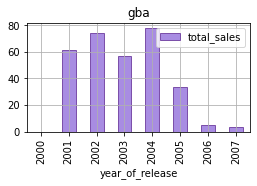

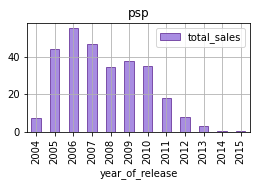

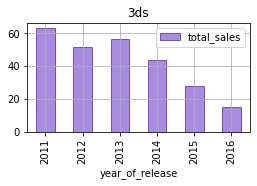

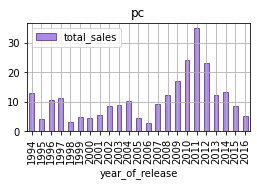

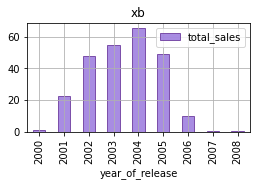

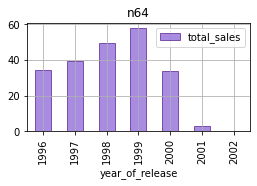

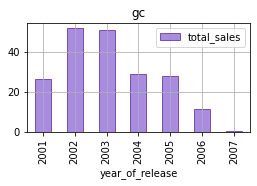

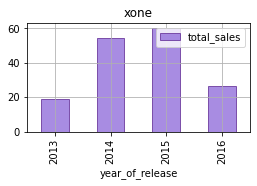

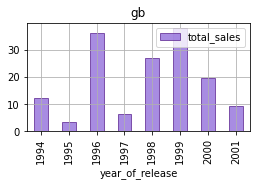

In [36]:
top = (games
       .pivot_table(index='platform', aggfunc={'total_sales':sum})
       .nlargest(16, columns='total_sales')
       )

top_16 = games.query('platform in @top.index').pivot_table(
    index='platform', aggfunc={'total_sales':sum}).sort_values(
    by='total_sales', ascending=False)

top_16_index = top_16.reset_index()

platforms_top_16 = top_16_index ['platform'].unique()

for platform in platforms_top_16:
    games[games['platform'] == platform].pivot_table(
        index = 'year_of_release', values = 'total_sales', aggfunc = 'sum'
    ).plot(kind = 'bar', grid=True, figsize=(4,2), color = 'mediumpurple', 
           alpha=0.8, edgecolor = 'rebeccapurple')
    plt.title(platform)

**За какой характерный срок появляются новые и исчезают старые платформы?**

In [37]:
# жизненный срок платформы

years_of_life = games.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
pc,1994,2016,22
ps2,2000,2011,11
psp,2004,2015,11
x360,2005,2016,11
wii,2006,2016,10
ps3,2006,2016,10
dc,1998,2008,10
ds,2004,2013,9
ps,1994,2003,9


Средний срок жизни каждой платформы на рынке - 8-10 лет. Затем либо на смену им приходят усовершенствованные версии, либо они исчезают с рынка. В топе находятся японская PlayStation, американский Xbox, приставки японской фирмы Nintendo.  

**PlayStation** вышла в **1994** году и сразу начала завоевывать рынок, дойдя до своего пикового значения в **1998** году (более 150 млн). 

Резкое **падение** приходится на **2001** год - появление **Xbox** (ок. 20 млн), обновленной версией **GBA** (ок. 60 млн) и **новой версии PlayStation 2** (ок.150 млн). К 2003 году PS1 практически исчезла с рынка.

В **2002** и **2004** году **PS2** достигла своих **пиковых значений** - более 200 млн. 

**2004** год также стал **пиковым** для **GBA** и **Xbox**. Однако **Xbox не смогла конкурировать** с GBA и PS2, количество проданных приставок было более чем в 3 раза меньше, чем PS2, и на 20 млн меньше, чем GBA. Далее продажи начали постепенно падать, скорее всего, в связи с выходом на рынок в **2004** году **PSP**, достигшей **пика продаж в 2006 году** (более 40 млн). 

В **2006** году продажи **PS2, PSP, Xbox и GBA начали резко падать** в связи с **выходом** на рынок **PS3, DS и X360**. **GBA и Xbox ушла** с рынка в **2007** году, **PS2 - в 2011, PSP - в 2013**. PSP просуществовала на рынке 10 лет, но не получила своего продолжения, видимо, в связи с недостаточной популярностью, и ушла с рынка.

Пришедшая на смену GBA, приставка **DS** к **2005** году достигла около 130 млн продаж, обойдя по количеству X360, став **лидером рынка**. **X360** на старте значительно **уступила DS** по количеству продаж - 50 млн против 130 млн (практически в 3 раза меньше). 

В **2006** году, на пике продаж DS, Nintendo выпустила **новый продукт - Wii**, продажи которого сразу начались практически со 150 млн консолей, в то время, как PS2 имела около 100 млн, а PS3 - только около 30 млн. В **2007** году продажи **Wii и DS** сровнялись, заняв **лидирующие позиции** на рынке. В этом же году **рост продаж PS3**. 

В **2008** году продажи **DS остались примерно на том же уровне**, а продажи **Wii продолжили расти**, достигнув своего **пика** в **2009** году - более 200 млн, достигнув уровня продаж PS2 в 2002 и 2004 году. Ни одна приставка больше не смогла достигнуть этих значений. 

Продажи **DS** начали сокращаться, резко **упав в 2011** году до примерно 30 млн, а продажи **Wii к 2011 году упали** до 50 млн. 

Параллельно **на лидирующие позиции вышли X360 и PS3**. В **2010 X360 обошла PS3**, перевалив за отметку 150 млн, PS3 её достигнуть не удалось. Однако в **2011** году ситуация поменялась: продажи **Xbox начали снижаться**. 

**PS3** в **2011** году заняло место **лидера**, достигнув своего пика - более 150 млн. Затем продажи немного упали, но 2 года держались на одном уровне. 

В **это же время** Nintendo выпустила новый продукт **3DS**, продав 60 млн консолей на старте, и обновленную **Wii U**, продав на старте 17 млн консолей. В 2014 году было продано около 40 млн. 

К **2014-2015**, с **выходом на рынок PS4**, продажи которой в 2014 году достигли 100 млн, продажи **X360 и PS3 снизились** до практически одинакового значения в 50 млн. Вышедшая в **2013** году на замену X360 приставка **XOne** на старте достигла около 20 млн продаж, в 2015 - 60 млн. 

#### Персональные компьютеры 

Помимо игровых приставок, важной частью игровой индустрии были компьютеры. В 1994 году компьютерные игры занимали примерно те же позиции, что и новая PS. С развитием и совершенствованием приставок, компьютеры утратили лидирующие позиции. До 2008 года количество проданных компьютерных игр не превышало 10 млн. К 2011 году продажа компьютерных игр достигла своего пикового значения - ок. 35 млн, затем снова пошла на спад. Тем не менее, компьютер в качестве игровой платформы присутствует на протяжении всего периода развития игровой индустрии. Нужно учитывать, что их операционная система также постоянно обновляется, однако связь новых версий операционных систем и количеством продаж игр мы проследить не сможем. Также нужно учитывать, что с развитием Интернета и сотовой связи пользователи начали активно играть в онлайн игры, либо скачивать игры бесплатно.
____________________________________________________________________________________________________________________________________________________________________________________

**РЕЗЮМИРУЕМ**

**PS1** (1994-2003: 10 лет) => **PS2** (2000-2010: 10 лет) => **PS3** (2006-2016: 10 лет) => **PS4** (2013 - наст.врем.) + **PSP** (2004-2013: 10 лет) - новые версии появляются каждые 6 лет.

**Xbox** (2000-2007: 7 лет) => **X360** (2005-2016: 11 лет) => **XOne** (2013 - наст.врем.) - нет определенного периода, разница между первой версией и второй 5 лет, между второй и третьей - 8 лет. 

**GBA** (2001-2007: 7 лет) => **DS** (2004-2013: 10 лет) - разница 3 года. 

**Wii** (2006-2014: 9 лет) => **Wii U** (2012-наст.врем.) - разница 7 лет. 

    * разница между GBA и Wii - 3 года.

Средняя продолжительность жизни наиболее продаваемых консолей 10 лет. Пикового значения продаж каждая консоль достигает на 4-5 год продаж. 

Для прогноза на 2017 берем период 2014-2016, чтобы отследить актуальные тенденции.

#### 3.3-3.4 Актуальный период: 2014-2016

#### 3.5 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [38]:
games = games.query('year_of_release >= 2014')
games['platform'].value_counts()

ps4     376
psv     295
xone    228
ps3     219
3ds     212
pc      151
x360    111
wiiu     73
psp      13
wii      11
Name: platform, dtype: int64

In [39]:
# построим графики динамики рынка 2014-2016

plats_14 = games[games['year_of_release']==2014]
plats_15 = games[games['year_of_release']==2015]
plats_16 = games[games['year_of_release']==2016]

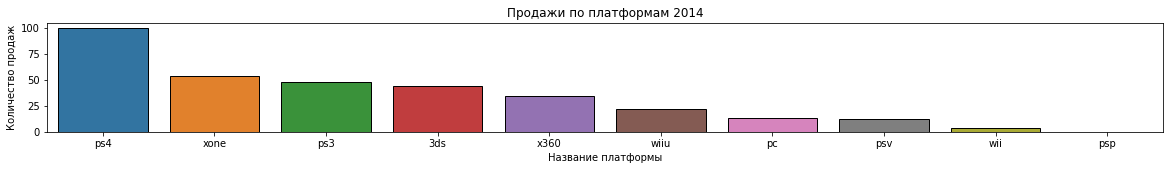

In [40]:
platforms_14 = plats_14.pivot_table(
    index='platform', values='total_sales', aggfunc='sum'
    ).sort_values(by='total_sales', ascending=False)

#визуализируем
plt.figure(figsize=(20,2))
sns.barplot(x=platforms_14.index,y=platforms_14['total_sales'], edgecolor = "black")
plt.title('Продажи по платформам 2014')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж');

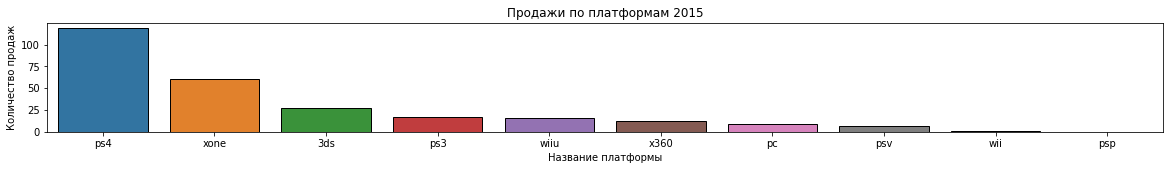

In [41]:
platforms_15 = plats_15.pivot_table(
    index='platform', values='total_sales', aggfunc='sum'
    ).sort_values(by='total_sales', ascending=False)

#визуализируем
plt.figure(figsize=(20,2))
sns.barplot(x=platforms_15.index,y=platforms_15['total_sales'], edgecolor = "black")
plt.title('Продажи по платформам 2015')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж');

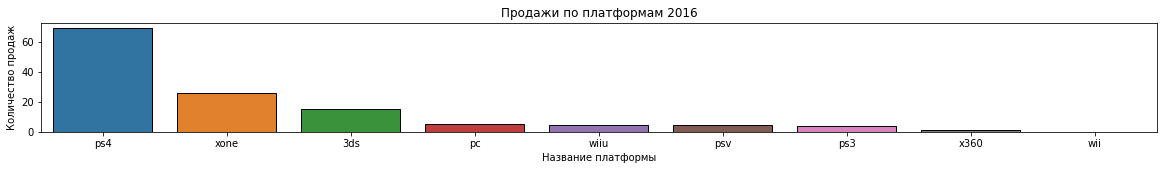

In [42]:
platforms_16 = plats_16.pivot_table(
    index='platform', values='total_sales', aggfunc='sum'
    ).sort_values(by='total_sales', ascending=False)

#визуализируем
plt.figure(figsize=(20,2))
sns.barplot(x=platforms_16.index,y=platforms_16['total_sales'], edgecolor = "black")
plt.title('Продажи по платформам 2016')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж');

**2016** 

Рынок 2016 года представлен такими приставками, как  X360 и Wii (на грани исчезновения), PS4, PS3, XOne, 3DS, Wii U, PSV (компании Sony, Microsoft, Nintendo) + PC

За исследуемый нами период произошло практически полное обновление рынка: DS > 3DS, PSP > PSV, Wii > Wii U, X360 > XOne, PS3 > PS4. 


**PSP > PSV**

В 2012 году PSV уже обгоняла предыдущее поколение примерно в 2 раза. Продажи PSV стабильно находились ниже 25 млн копий, постепенно уменьшаясь. Сейчас ее доля на рынке минимальна. PSP полностью покинула рынок в 2015 году. Падение продаж PSP не привело к росту продаж PSV. 

**DS > 3DS**

Приставка 3DS показала себя как одна из наиболее стабильных платформ. В 2012 году она уже находилась в ТОП-3, имея около 50 млн продаж, в то время как продажи DS не были значительными, около 10 млн копий. В 2013 году DS достигла своего минимального уровня, а объем продаж 3DS увеличился, перешагнув за 50 млн. В 2014 году консоль вышла из ТОП-3 - на рынке появились PS4 и XOne, которые заняли место своих предшественниц. 3 место заняла PS3. В 2015 году 3DS вернулась в ТОП-3 и до этого года включительно его не покидала. С 2014 года продажи приставки уменьшились в 2 раза, достигнув 25 млн копий в 2015 году.

**Wii > Wii U**

В 2012 году приставки находились практическии на одном уровне с 25 млн проданных игр. В 2013 году продажи Wii резко упали, но это не привело к заметному росту продаж Wii U. Продажи обеих приставок начали падать. Wii и Wii U имеет минимальный уровень продаж.

**X360 > XOne**

На протяжении периода американские приставки занимают 2 место в ТОП-3. В 2012 году объем продаж PS3 и X360 были практически на одном уровне, 100 млн проданнх копий. В 2013 году прродажи X360 упали относительно PS3, чьи продаже увеличились, скорее всего, в связи с падением продаж PSP и PSV, переходом их пользователей на другую версию. В 2014 году выходит новая XOne и занимает место X360 в ТОП-30, имея 50 млн проданных копий. Продажи X360 падают, но все еще находятся на высоком уровне - более 25 млн. Сейчас объем продаж уэтой версии довольно низкий. При этом это не оказало влияния на продажи XOne, продажи которой сохранили свой объем в 50 млн проданных игр в 2015 году.

**PS3 > PS4**

Приставки фирмы Sony являются самыми продаваемыми за исследуемый период. В 2012 году объем продаж переваливал за 100 млн, увеличившись в 2013 году. В 2014 вышла PS4, которая сразу же заняла место PS3 и достигла 100 млн проданных игр. При этом PS3 осталась в ТОП-3, имея высокий уровень продаж - 50 млн. Соответственно, в этом году на две приставки фирмы Sony пришлось 150 млн проданных игр. В 2015 году PS3 вышла из тройки, но по-прежнему имела продажи выше, чем остальные приставки (кроме 3DS). Продажи PS4 значительно поднялись, что, скорее всего, связано с переходом пользователей со старой версии на новую. В 2015 году продажи PS3 составили чуть меньше 25 млн. Продажи PS4 также упали до примерно 70 млн копий, но ей по-прежнему принадлежит большая часть рынка. 

Продажи игр для персональных компьютеров также стабильны, имея объем продаж менее 25 млн. Продажи уменьшаются, в 2015 году они составили около 10 млн. 

#### 3.6 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

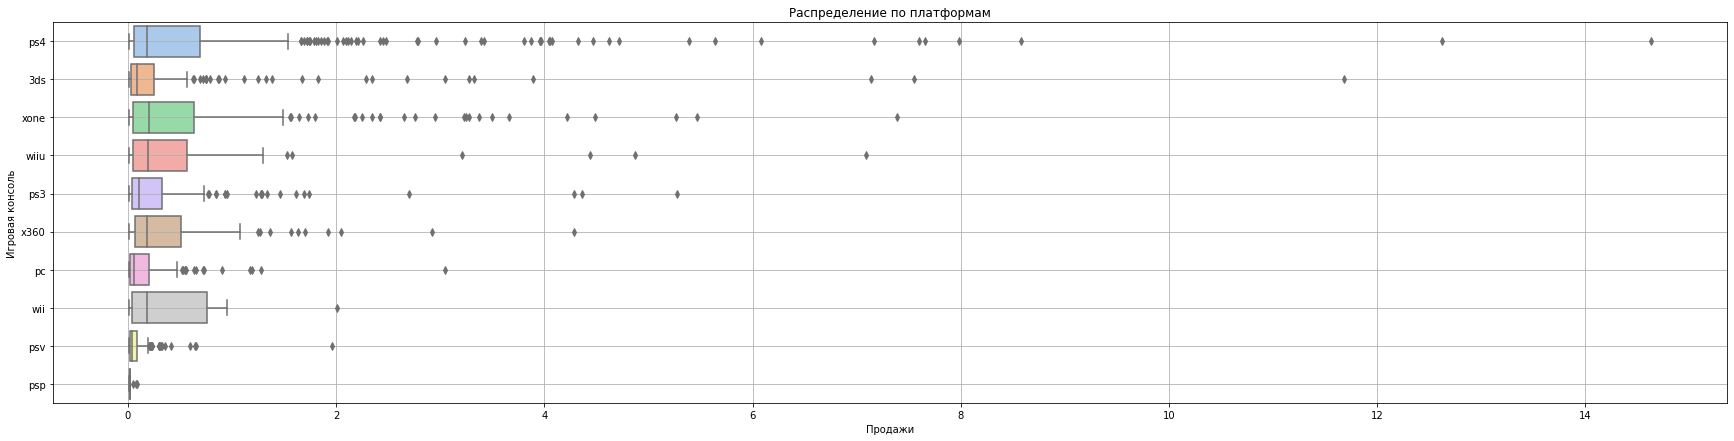

In [43]:
#строим "ящик с усами"

plt.figure(figsize=(30,7))
sns.set_palette('pastel')
sns.boxplot(data=games, y='platform', x='total_sales')
plt.title('Распределение по платформам')
plt.grid()
plt.xlabel('Продажи')
plt.ylabel('Игровая консоль');

(0.0, 0.9)

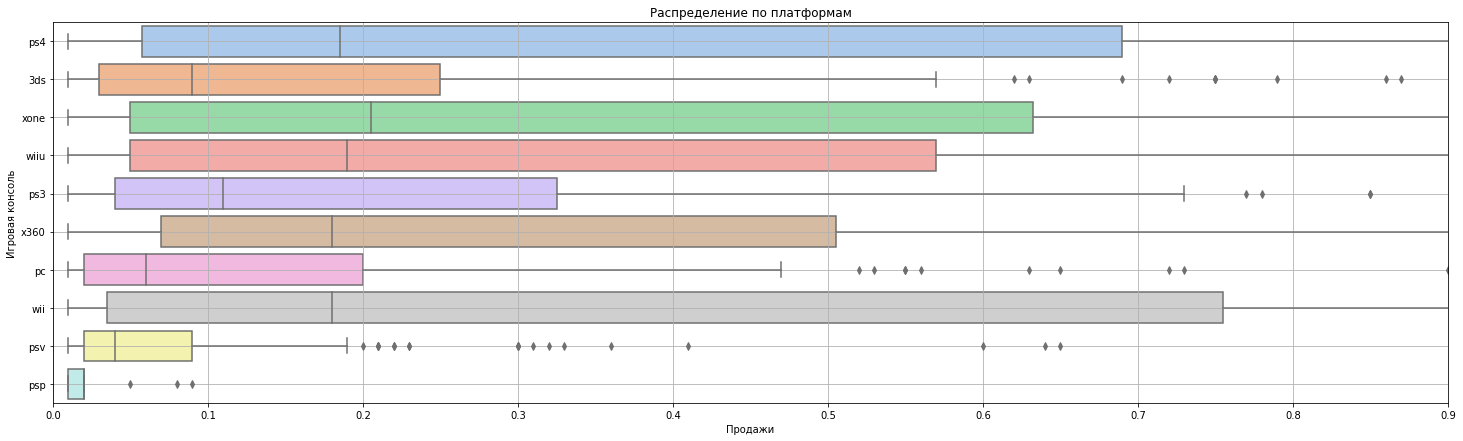

In [44]:
plt.figure(figsize=(25,7))
sns.set_palette('pastel')
sns.boxplot(data=games, y='platform', x='total_sales')
plt.title('Распределение по платформам')
plt.grid()
plt.xlabel('Продажи')
plt.ylabel('Игровая консоль')
plt.xlim(0,0.9)

Для сравнения продаж построили два ящика с усами. График демонстрирует популярность платформ за интересующий нас период - показателем является межквартильный размах и медиана. Чем выше их значение, тем платформы популярнее. Наиболее популярными и рентабельными стали приставки 3DS, X360, PC, PS3, PS4, XOne и Wii U. 

#### 3.7 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

In [45]:
#подготовим данные

games_corr = games.query('user_score > 0 and critic_score > 0')

In [46]:
# продаваемость платформ
#выберем с самыми высокими продажами

games_piv = games_corr.pivot_table(
    index='platform', values='total_sales', aggfunc = (
        {'total_sales' : 'sum'})).sort_values(by='total_sales', ascending=False).reset_index()

games_piv

,platform,total_sales
0,ps4,219.20
1,xone,115.29
2,wiiu,33.83
3,3ds,24.21
4,pc,23.81
5,ps3,11.36
6,x360,10.10
7,psv,7.92


**PS4**

In [47]:
#изучим корреляцию между количеством проданных игр, оценками критиков и оценками пользователей
round(games_corr[games_corr.platform == "ps4"][['total_sales', 'critic_score', 'user_score']].corr(),1)


,total_sales,critic_score,user_score
total_sales,1.0,0.4,-0.0
critic_score,0.4,1.0,0.5
user_score,-0.0,0.5,1.0


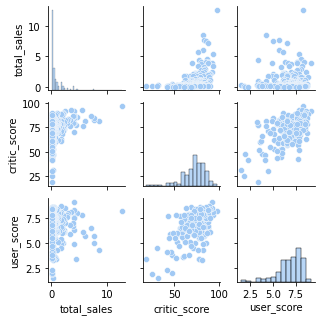

In [48]:
sns.pairplot((games_corr[games_corr.platform == "ps4"][['total_sales', 'critic_score', 'user_score']]), height=1.5)
plt.show()

Связь между отзывами критиков и продажами положительная, умеренная. Чем выше оценка критика, тем выше продажи. Мнение пользователей не влияет на продажи, однако есть игры, которые имеют больше продаж, и ниже оценки. Отзывы пользователей и критиков связаны между собой, скорее всего они прислушиваются друг к другу или отталкиваются от выставленных оценок. 

#### 3.8 Соотнесем выводы с продажами игр на других платформах.


In [49]:
# изучим корреляцию 

round(games_corr.groupby('platform')[['total_sales','critic_score','user_score']].corr(),2)

total_sales  critic_score  user_score
platform                                                    
3ds      total_sales          1.00          0.28        0.28
         critic_score         0.28          1.00        0.86
         user_score           0.28          0.86        1.00
pc       total_sales          1.00          0.17       -0.09
         critic_score         0.17          1.00        0.47
         user_score          -0.09          0.47        1.00
ps3      total_sales          1.00          0.45        0.16
         critic_score         0.45          1.00        0.69
         user_score           0.16          0.69        1.00
ps4      total_sales          1.00          0.40       -0.04
         critic_score         0.40          1.00        0.55
         user_score          -0.04          0.55        1.00
psv      total_sales          1.00          0.04        0.02
         critic_score         0.04          1.00        0.52
         user_score           0.02          0.52        1.00
wiiu     total_sales          1.00          0.38        0.41
         critic_score         0.38          1.00        0.76
         user_score           0.41          0.76        1.00
x360     total_sales          1.00          0.53        0.34
         critic_score         0.53          1.00        0.63
         user_score           0.34          0.63        1.00
xone     total_sales          1.00          0.42       -0.09
         critic_score         0.42          1.00        0.44
         user_score          -0.09          0.44        1.00

**РЕЗЮМИРУЕМ**

Оценки критиков оказывают большее влияние на увеличение объема продаж, чем оценки пользователей. Однако у некоторых платформ (PC, PS4, X360, XOne) есть отрицательная корреляция, соответственно, у хорошо продаваемых игр бывают низкие оценки. Оценки пользователей чаще бывают низкими, в сравнении с оценками критиков, однако чаще всего они сходятся во мнении. Также заметно, что новые платформы сильнее подвержены влиянию оценок критиков, чем предыдущие версии.

#### 3.9 Посмотрим на общее распределение игр по жанрам

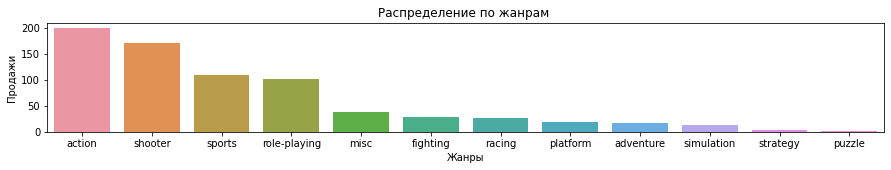

In [50]:
#построим столбцатую диаграмму, чтобы посмотреть, какие жанры лидируют, какие не пользуются популярностью или мало представлены на рынке

genre_pivot = games.pivot_table(
    index='genre', aggfunc=({'total_sales' : 'sum'})).sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)

plt.figure(figsize=(15,2))
plt.title('Распределение по жанрам ')
sns.barplot(data=genre_pivot, x='genre', y='total_sales')
plt.xlabel('Жанры')
plt.ylabel('Продажи');

Самыми популярными жанрами является экшн, далее за ним следуют шутеры, ролевые и спортивные игры. Замыкают список стратегии и головоломки. 

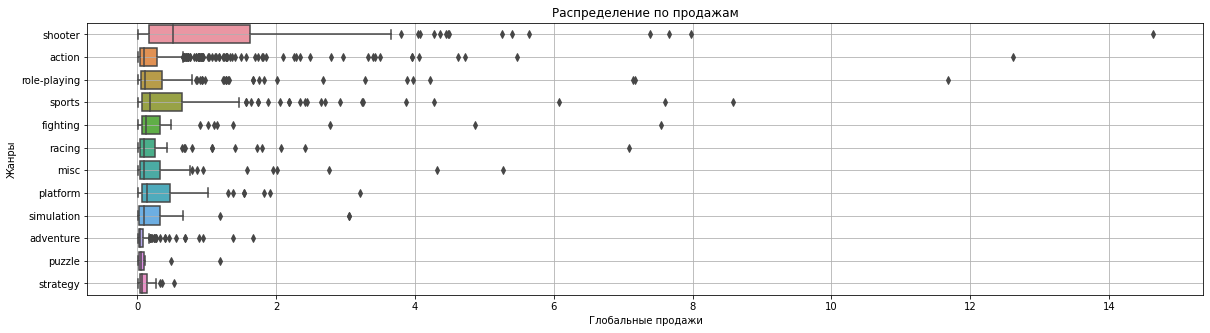

In [51]:
#строим "ящик с усами" с выбросами
genres_2016 = games[games['genre'].isin(
    ['action', 'adventure', 'role-playing', 'misc', 'sports', 'simulation', 'racing', 'strategy', 'fighting', 'platform', 'shooter', 'puzzle'])]

genres_2016 = genres_2016.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(20,5))
sns.set_palette('pastel')
sns.boxplot(data=genres_2016, y='genre', x='total_sales')
plt.title('Распределение по продажам')
plt.grid()
plt.xlabel('Глобальные продажи')
plt.ylabel('Жанры');

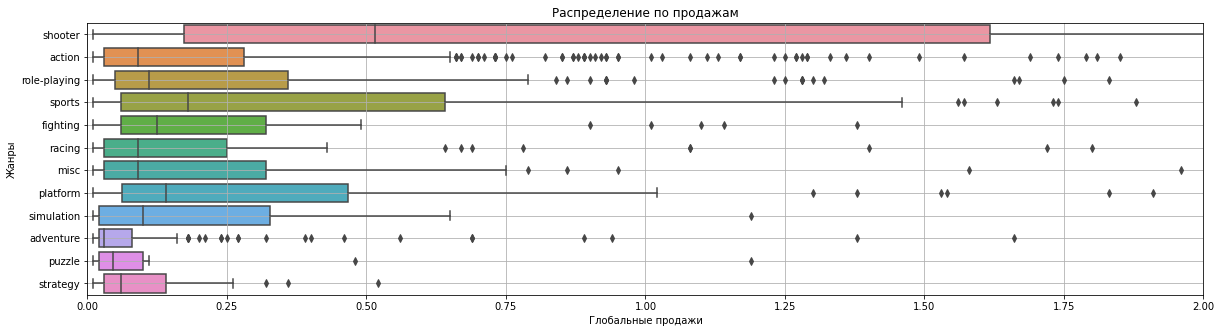

In [52]:
#строим "ящик с усами" с выбросами
genres_2016 = games[games['genre'].isin(
    ['action', 'adventure', 'role-playing', 'misc', 'sports', 'simulation', 'racing', 'strategy', 'fighting', 'platform', 'shooter', 'puzzle'])]

genres_2016 = genres_2016.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(20,5))
sns.set_palette('pastel')
sns.boxplot(data=genres_2016, y='genre', x='total_sales')
plt.title('Распределение по продажам')
plt.grid()
plt.xlim(0,2)
plt.xlabel('Глобальные продажи')
plt.ylabel('Жанры');

Как видно из графиков, среди пользователей популярностью пользуются шутеры - их выпускают в большом количестве, их игры приносят больше всего прибыли. Рентабельными и популярными являются также экшн, ролевые игры, спорт, гонки, платформеры.

#### Промежуточный вывод

В анализируемом датасете представлены данные развития игровой индустрии за прошедшие 36 лет (1980-2016 год). 

В начале развития игровой индустрии несомненным лидером была Япония. Именно там появились первые игровые консоли, которые используются и сегодня. 

До 1985 года игр было мало и они были плохого качества. Первую революцию на рынке совершила консоль Nintendo, однако качество игр также было низким в связи со стремление быстрее занять место на рынке. 

Следующий скачок совершила в 1988 году Сега. 

Однако настоящую революцию совершила консоль PlayStation, вышедшая в 1994 году. Она стала отправной точкой для популяризации видеоигр и роста продаж. Эта приставка до сих пор является одной из лучших платформ по всему миру. 

Следующий пик развития индустрии связан с выходом на рынок Америки. В 2001 году Микрософт представил миру свою первую консоль Xbox, которая также до сих пор пользуется популярностью и на сегодняшний день является лидером по количеству продаж. 

Общие продажи видеоигр снизились после финансового кризиса 2008-2009, однако в 2011 году в индустрии снова начался бум. 

Сегодня видеоигры не пользуются такой популярностью, как это было 10-15 лет назад, но они все еще остаются важным сегментом индустрии. 

С 1994 года лидерами продаж стали японские консоли PlayStation, Nintendo и американская X360. В среднем каждая приставка живет 10 лет: ей на замену приходят усовершенствованные версии, либо приставка уходит с рынка. Пик продаж обычно приходится на 4-5 год существования приставки. 

Наиболее стабильна PlayStation: новые консоли появляются каждые 6 лет, с истечением 10 лет старые приставки уходят. Nintendo выпускает новый продукт каждые 3 года. 

В связи с этим за актуальный период для прогноза на 2017 год взяли 2012-2016.

Сегодня рынок игровых приставок представлен такими приставками, как  X360 и Wii (на грани исчезновения), PS4, PS3, XOne, 3DS, Wii U, PSV (компании Sony, Microsoft, Nintendo) и персональными компьютерами. 

Наиболее перспективными платформами являются PS4, XOne, 3DS, Wii U, PC.

Оценки критиков оказывают большее влияние на увеличение объема продаж, чем оценки пользователей. Однако у некоторых платформ (PC, PS4, XOne) есть отрицательная корреляция, соответственно, у хорошо продаваемых игр бывают низкие оценки. Оценки пользователей чаще бывают низкими, в сравнении с оценками критиков, однако чаще всего они сходятся во мнении. Также заметно, что новые платформы сильнее подвержены влиянию оценок критиков, чем предыдущие версии.

Cреди пользователей популярностью пользуются шутеры - их выпускают в большом количестве, их игры приносят больше всего прибыли. Рентабельными и популярными являются также экшн, ролевые игры, спорт, гонки, платформеры.

### 4. Портрет пользователя каждого региона


**Изучим продажи игр по платформам в разрезе регионов**

#### Cамые популярные платформы  в различных регионах 

In [53]:
# создадим категорию "другие" для платформ, которые не войдут в выборку

def graph (df, year, region, name, axes):
    
    df = games.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
      
    labels_c=sales.platform
    colours = {'wii':'C60', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'x360':'C4', 
    'ps3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'ps4':'lightsteelblue', '3ds':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'pc':'Fuchsia', '2600':'C15', 'psp':'C48', 
               'xone':'LimeGreen',
               'wiiu':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'psv':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

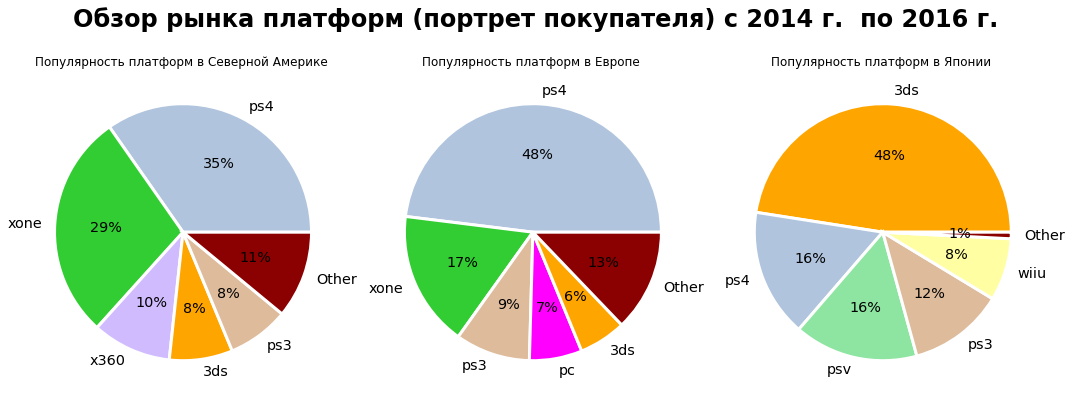

In [54]:
x_year = 2014 

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(games, x_year,'eu_sales', 'Европе', axes[1])
graph(games, x_year, 'jp_sales', 'Японии', axes[2])

PS4 является абсолютным лидером продаж в Европе (48%) и Америке (35%). В Японии она делит второе место с PSV. При этом PSV не входит в топ продаж в других регионах. Второй по популярности в Европе и Америке XOne - 17% и 29%. В Японии эта платформа в топ-5 не входит. PS3 входит в топ во всех регионах: Америка - 8%, Европа - 9%, Япония - 12%. В топ всех регионов в разных долях также входит 3DS: Америка - 8%, Европа - 6%, Япония - 48% (абсолютный лидер продаж). Также, в Японии в топ-5 попадает Wii U (8%). Остальные приставки относятся к категории "другие".

Стоит отметить, что суммарно Playstation и XBox занимают большую долю рынка. В Европе и Америки вместе на них приходятся две трети продаж, в Японии большая доля приставок PlayStation. При этом жизненный цикл PS3 и X360 подходит к концу, поэтому в ближайшее время можно ожидать рост продаж платформ PS4 и XOne.Также отметим, что в Японии топ-5 состоит только из японских приставок.

**Изучим региональные жанры**

In [55]:
def graph (df, year, region, name, axes):
    
    df = games.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='genre', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'genre': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['genre', 'sales']
      
      
    labels_c=sales.genre
    colours = {'action':'C60', 'adventure':'C1', 'role-playing':'C2', 'misc':'C3', 'sports':'C4', 
    'simulation':'C5', 'racing':'C6', 'strategy':'C7', 'fighting':'C8',
               'platform':'lightsteelblue', 'shooter':'orange', 
               'puzzle':'C11','Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

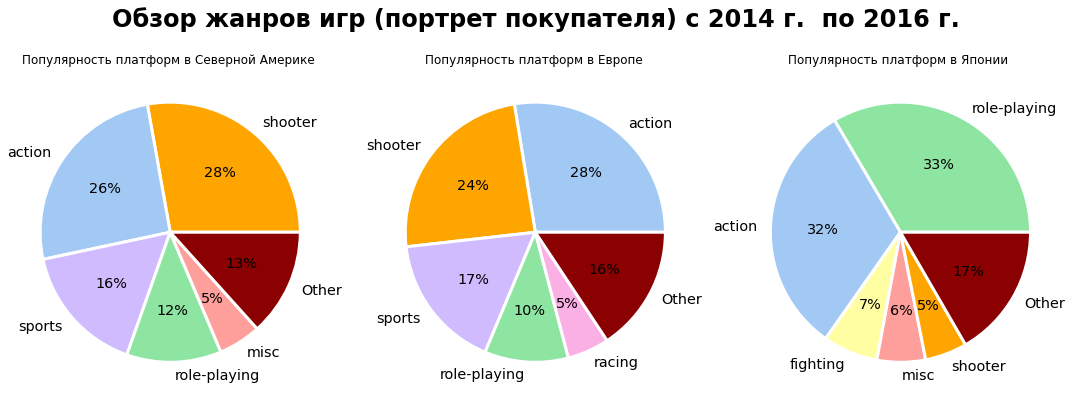

In [56]:
x_year = 2014 

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор жанров игр (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(games, x_year,'eu_sales', 'Европе', axes[1])
graph(games, x_year, 'jp_sales', 'Японии', axes[2])

В Америке и Европе пользователи чаще всего выбирают экшн, шутеры и спорт. В Японии лидерами являются ролевые игры и экшн, шутеры не пользуются здесь такой же популярностью, как в других регионах. Ролевые игры в Европе и Америке занимают десятую долю рынка. Небольшая доля у мультижанра (В Японии и Америке) и гонках (Европа). 

#### ESRB

**Рейтинг ESRB:**

* E = все возрастные категории

* M = 17+

* T = 13+

* E10+ = 10+

* K-A = для взрослых и детей

* AO = 18+

* EC = для детей младшего возраста

* RP = без категории

    * *для справки*

In [57]:
def graph (df, year, region, name, axes):
    
    df = games.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='rating', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales.columns = ['rating', 'sales']
      
    labels_c=sales.rating
    colours = {'E':'C60', 'M':'C1', 'T':'C2', 'E10+':'C3', 'K-A':'C4', 
    'simulation':'C5', 'racing':'C6', 'strategy':'C7', 'fighting':'C8',
               'AO':'lightsteelblue', 'EC':'orange', 
               'RP':'C11','unknown':'salmon'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()


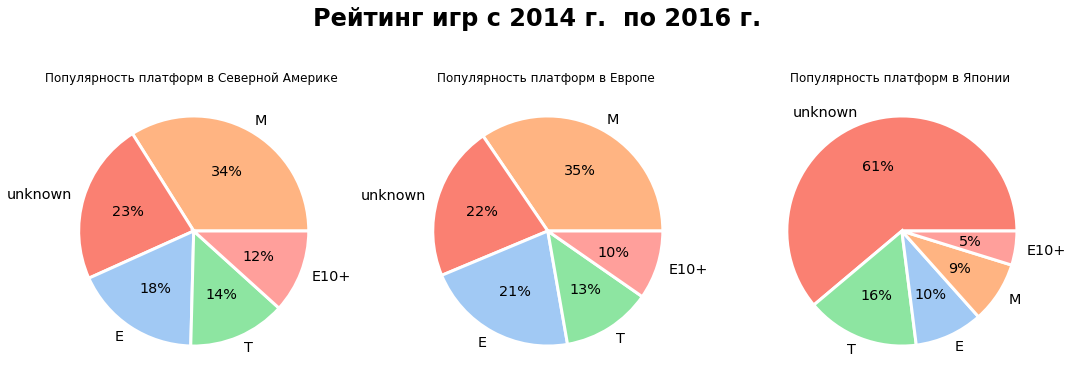

In [58]:
x_year = 2014 

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Рейтинг игр с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(games, x_year,'eu_sales', 'Европе', axes[1])
graph(games, x_year, 'jp_sales', 'Японии', axes[2])

В выборке представлены игры 4 видов рейтинга: E10+, M, E, T. Большая доля жанров нам неизвестна. 

В Европе и Америке рейтинги находятся практически в равных долях. Пятая часть игр не имеет рейтинга. Затем идут игры 17+, игры для всех возрастов, 13+, 10+. 

Япония кардинально отличается от европесйких и американских стран. В Японии не имеют маркировку 60% игр. Если вспомнить, что в Японии с большим отрывом лидирует 3DS, можем предположить наличие корреляции. В Японии также основная аудитория - подростки. Хорошие продажи у 13+, игр всех возрастов и 10+. Молодые люди старше 17 лет играют в видеоигры явно меньше.

#### Портреты геймеров Европы, Америки и Японии

**Европейский пользователь**
В Европе играют люди всех возрастов. Среднестатистического европейского пользователя можно описать как игрок 10+, предпочитающий японские приставки PS3 и PS4, выбирающий в основном жанры экшн, спорт и шутеры.  
______________________________________________________________________________________________________________________________________________

**Американский пользователь**
В Америке играют люди всех возрастов. Американцы имеют разнообразные приставки, предпочтение отдают американскую консоль X360.  Популярные жанры -  

Среднестатистического американского пользователя можно описать как игрок 13+, предпочитающий американскую приставку X360, японские PS3 и PS4, выбирающий в основном жанры экшн  шутеры.  
____________________________________________________________________________________________________________________________________________________

**Японский пользователь**
В Японии также большинство игроков люди всех возрастов. Среднестатистического японского пользователя можно описать как игрок 13+, предпочитающий консоли японского производства. Молодые люди 17+ играют реже. Ведущие жанры - ролевые игры и экшн
.

### Проверка гипотез

**Задачи:**

Проверить гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

+ Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

    * Для проверки гипотез используeм t-критерий Стьюдента (st.ttest_ind): выборки независимы между собой
    * Пороговое значение alpha = 0.05

#### Гипотеза №1

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**


In [59]:
#подготовим данные
xone_hyp = games[(games['platform'] == 'xone') & (games['user_score'] > 0)]['user_score']
pc_hyp = games[(games['platform'] == 'pc') &  (games['user_score'] > 0)]['user_score']

#посчитаем показатель среднего пользовательского рейтинга для каждой платформы
print('Средний пользовательский рейтинг Xbox One:', xone_hyp.mean())
print('Средний пользовательский рейтинг PC', pc_hyp.mean())

Средний пользовательский рейтинг Xbox One: 6.594545454545456
Средний пользовательский рейтинг PC 6.298360655737705


H0: Средние пользовательские рейтинги платформ Xbox One и PC равны

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [60]:
#проверяем гипотезу

alpha = 0.05

results = st.ttest_ind(
    xone_hyp, 
    pc_hyp, 
    equal_var=False)


print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги платформ XBox и PC не одинаковы, с вероятностью в практически 12% такое или большее различие можно получить случайно. Исходя из этих рассчето, мы не можем делать вывод о значимом различии между средними рейтингами, не можем отвергнуть нулевую гипотезу.

#### Гипотеза №2

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**


H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [61]:
#подготовим данные
action = games[(games['genre'] == 'action') &  (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'sports') &  (games['user_score'] > 0)]['user_score']

#посчитаем показатель среднего пользовательского рейтинга для каждой платформы
print('Средний рейтинг жанра Action:', action.mean())
print('Средний рейтинг жанра Sports', sports.mean())

Средний рейтинг жанра Action: 6.760606060606061
Средний рейтинг жанра Sports 5.2251968503937


In [62]:
#проверяем гипотезу

alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


P-value практически равно 0, это дает нам основание отвергнуть нулевую гипотезу.  Не можем утверждать, что орейтинги экшн-игр и спортивных игр равны. 

### Заключение

Чтобы спрогнозировать продажи видео игр в 2017 году, был загружен набор данных интернет-магазина «Стримчик», содержащий информацию об исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах за прошедшие 36 лет (1980-2016 год).

Было получено представление об исторических тенденциях в развитии игровой индустрии. Резкий рост продаж видеоигр начался в конце 80-х - начале 90-х годов, продолжился в начале 2000-х. В компьютерной индустрии началась технологическая гонка: консоль Nintendo (1985), Sega Mega Drive (Genesis) (1988), PlayStation (1994), Xbox (2001). С этого момента началось активное распространение игровых консолей по всему миру. 

За актуальный период был принят 2014-2016 - постепенный уход с рынка PS3 и X360, выход на рынок PS4 и XOne, пик продаж которых ожидается в 2017. 

Для работы с данными была произведена их предобработка. Она состояла из 6 этапов: обработка регистра, пропусков, типов данных, дубликатов, округления дробей с длинными хвостами, добавление столбца 'total_sales' - суммарные продажи каждой игры. 

В данных большое количество пропусков. Столбец с оценками критиков перевалил за 50%, оценки пользователей и рейтинга - за 40%. В процессе работы с пропусками по столбцу 'name' были удалены 2 пропуска, по столбцу 'year_of_release' - 269 значений (часть данных была восстановлена по названию игры, выпущенной на разных платформах), столбец 'critic_score' и user_score были заполнены 0, их невозможно заполнить статистическими методами. В столбце 'user_score' обработали нетипичное строковое значение tbd - оно было переформатировано в NaN. Отсутствующие позиции рейтинга были заменены на строковое значение unknown, поскольку их восстановить также невозможно. 

Явных дубликатов нет. Есть два неявных неполных дубликата (разный год). Удалили один полный неявный дубликат. 


Все названия столбцов и строковые значения в таблице были приведены к нижнему регистру.

Был изменен тип данных: 'year_of_release' - int64.


В ходе исследовательского анализа было отмечено, что сегодня видеоигры не пользуются такой популярностью, как это было 10-15 лет назад, но они все еще остаются важным сегментом индустрии. Стремительное развитие игровой индустрии связывают с выходом на рынок первой приставкой PlayStation в 1994. 

За 22 года лидерами продаж стали японские консоли PlayStation, Wii и DS от Nintendo и американский XBox. В ходе исследования количества продаж были отобраны ряд приставок и персональные компьютеры и описана история их становления и развития. 

Исследовательский анализ показал, что в среднем приставка живет 10 лет: ей на замену приходят усовершенствованные версии, либо приставка уходит с рынка. Пик продаж обычно приходится на 4-6 год существования приставки. Наиболее стабильной приставкой является PlayStation: новые консоли появляются каждые 6 лет, с истечением 10 лет старые приставки уходят. Nintendo выпускает новый продукт каждые 3 года. Остальные приставки не имеют конкретной периодизации.

Сегодня рынок игровых приставок представлен такими приставками, как  X360 и PS3 (на грани исчезновения), PS4, XOne, 3DS, Wii U, PSV, PSP (компании Sony, Microsoft, Nintendo) и персональными компьютерами. 

PS4 является абсолютным лидером продаж в Европе (48%) и Америке (35%). В Японии она делит второе место с PSV. При этом PSV не входит в топ продаж в других регионах. Второй по популярности в Европе и Америке XOne - 17% и 29%. В Японии эта платформа в топ-5 не входит. PS3 входит в топ во всех регионах: Америка - 8%, Европа - 9%, Япония - 12%. В топ всех регионов в разных долях также входит 3DS: Америка - 8%, Европа - 6%, Япония - 48% (абсолютный лидер продаж). Также, в Японии в топ-5 попадает Wii U (8%). Отмечаем, что суммарно Playstation и XBox занимают большую долю рынка. В Европе и Америки вместе на них приходятся две трети продаж, в Японии большая доля приставок PlayStation. При этом жизненный цикл PS3 и X360 подходит к концу, поэтому в ближайшее время можно ожидать рост продаж платформ PS4 и XOne.Также отметим, что в Японии топ-5 состоит только из японских приставок.

Связь между отзывами критиков и продажами положительная, умеренная. Чем выше оценка критика, тем выше продажи. Мнение пользователей не влияет на продажи, однако есть игры, которые имеют больше продаж, и ниже оценки. Отзывы пользователей и критиков связаны между собой, скорее всего они прислушиваются друг к другу или отталкиваются от выставленных оценок.

Для получения точной картины о пользователях приставок были исследованы данные в разрезе регионов: Европы, Америки, Японии.

В Америке и Европе пользователи чаще всего выбирают экшн, шутеры и спорт. В Японии лидерами являются ролевые игры и экшн, шутеры не пользуются здесь такой же популярностью, как в других регионах. Ролевые игры в Европе и Америке занимают десятую долю рынка. Небольшая доля у мультижанра (В Японии и Америке) и гонках (Европа).

В выборке представлены игры 4 видов рейтинга: E10+, M, E, T. Большая доля жанров нам неизвестна.

В Европе и Америке рейтинги находятся практически в равных долях. Пятая часть игр не имеет рейтинга. Затем идут игры 17+, игры для всех возрастов, 13+, 10+.

Япония кардинально отличается от европесйких и американских стран. В Японии не имеют маркировку 60% игр. Если вспомнить, что в Японии с большим отрывом лидирует 3DS, можем предположить наличие корреляции. В Японии также основная аудитория - подростки. Хорошие продажи у 13+, игр всех возрастов и 10+. Молодые люди старше 17 лет играют в видеоигры явно меньше.

С помощью t-критерия Стьюдента были проверены 2 гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Первую гипотезу о равенстве рейтингов XOne и PC не можем отвергнуть: полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги платформ XBox и PC неодинаковы, с вероятностью в практически 12% такое или большее различие можно получить случайно.Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.

Вторую гипотезу о равенстве средних пользовательских рейтингов жанров экшн и спорт отвергли. P-value практически равно нулю, значения не могут быть равны.  

Таким образом, наиболее перспективными платформами на 2017 год являются PS4, XOne, 3DS, Wii U, PSV (в Японии), PC (в Европе).






